In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport MediaIndexer
%aimport MediaIndexer.utils
%aimport MediaIndexer.redis_cache
%aimport MediaIndexer.redis_utils
import glob

In [4]:
databases = MediaIndexer.redis_utils.load_databases("../cfg_local.ini")
databases


{'rq': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=0>>>,
 'rq_thumb': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=1>>>,
 'rq_cache': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=2>>>,
 'cache_xxhash': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=10>>>,
 'cache_xxhash_': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=11>>>,
 'cache_exif': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=12>>>,
 'cache_sha512': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=13>>>,
 'cache_sha512_': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=13>>>,
 'cache_image_128x128': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=20>>>,
 'cache_image_608x608': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=21>>>,
 'cache_image_1024x1024': StrictRedis<ConnectionPool<Connection<host=127.0.0.1,port=6379,db=22>>>,
 'cache_

In [10]:
for db_name, database in databases.items():
    print("{}: {}".format(db_name, database.dbsize()))

rq: 17428
rq_thumb: 2
rq_cache: 0
cache_xxhash: 27087
cache_xxhash_: 14905
cache_exif: 14905
cache_sha512: 0
cache_sha512_: 0
cache_image_128x128: 13657
cache_image_608x608: 13657
cache_image_1024x1024: 13658
cache_image_3: 0
cache_image_4: 0
cache_image_5: 0
cache_image_6: 0
cache_image_7: 0
cache_image_8: 0
cache_image_9: 0


In [11]:
test_images = glob.glob("/tmp/darknet/data/*.jpg")
for image in test_images:
    break

In [12]:
MediaIndexer.redis_cache._get_exif(file_path=image, databases=databases)


[X] hash : /tmp/darknet/data/giraffe.jpg
[X] EXIF : /tmp/darknet/data/giraffe.jpg


{'SourceFile': '/tmp/darknet/data/giraffe.jpg',
 'ExifTool:ExifToolVersion': 10.8,
 'File:FileName': 'giraffe.jpg',
 'File:Directory': '/tmp/darknet/data',
 'File:FileSize': 382965,
 'File:FileModifyDate': '2018:10:12 03:50:00-04:00',
 'File:FileAccessDate': '2018:10:12 03:50:11-04:00',
 'File:FileInodeChangeDate': '2018:10:12 03:50:00-04:00',
 'File:FilePermissions': 664,
 'File:FileType': 'JPEG',
 'File:FileTypeExtension': 'JPG',
 'File:MIMEType': 'image/jpeg',
 'File:ImageWidth': 500,
 'File:ImageHeight': 500,
 'File:EncodingProcess': 0,
 'File:BitsPerSample': 8,
 'File:ColorComponents': 3,
 'File:YCbCrSubSampling': '1 1',
 'JFIF:JFIFVersion': '1 1',
 'JFIF:ResolutionUnit': 1,
 'JFIF:XResolution': 300,
 'JFIF:YResolution': 300,
 'ICC_Profile:ProfileCMMType': 'Lino',
 'ICC_Profile:ProfileVersion': 528,
 'ICC_Profile:ProfileClass': 'mntr',
 'ICC_Profile:ColorSpaceData': 'RGB ',
 'ICC_Profile:ProfileConnectionSpace': 'XYZ ',
 'ICC_Profile:ProfileDateTime': '1998:02:09 06:49:00',
 'ICC_

In [13]:
MediaIndexer.redis_cache._get_thumbnail(
    file_path=image, databases=databases, pil_image=True
)


pil_image: True
[X] hash : /tmp/darknet/data/giraffe.jpg
** KWARGS DEBUG
* pil_image: True
**
[X] thumb(128) : /tmp/darknet/data/giraffe.jpg


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\x80\x00\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [18]:
thumbnails=dict()
for size in [128, 608, 1024]:
    tn_=MediaIndexer.redis_cache._get_thumbnail(
        file_path=image, databases=databases, size=size
    )
    thumbnails[size]=MediaIndexer.utils.pil_thumbnail(tn_)


size: 128
[X] hash : /tmp/darknet/data/giraffe.jpg
** KWARGS DEBUG
**
[X] thumb(128) : /tmp/darknet/data/giraffe.jpg
size: 608
[X] hash : /tmp/darknet/data/giraffe.jpg
** KWARGS DEBUG
**
[X] thumb(608) : /tmp/darknet/data/giraffe.jpg
size: 1024
[X] hash : /tmp/darknet/data/giraffe.jpg
** KWARGS DEBUG
**
[X] thumb(1024) : /tmp/darknet/data/giraffe.jpg


In [19]:
len(thumbnails)

3

In [20]:
thumbnails

{128: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=128x128 at 0x7FC523CB4C18>,
 608: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7FC523CB4A58>,
 1024: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7FC523CB4C88>}

In [21]:
import IPython.display

128


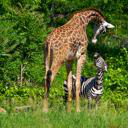

608


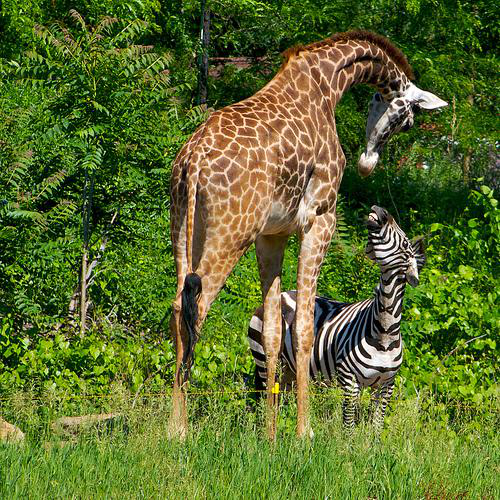

1024


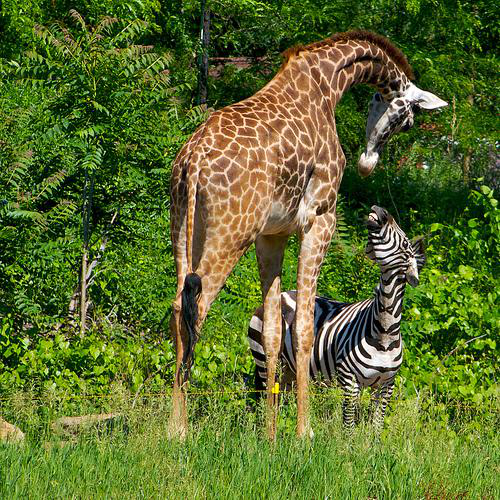

In [23]:
for size, thumbnail in thumbnails.items():
    print(size)
    IPython.display.display(thumbnail)